In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# destop path
import os
import glob
from functions import load_obj

In [3]:
desktop = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop') 
desktop

'C:\\Users\\news1\\Desktop'

In [4]:
path_detect = os.path.join(desktop, 'result_exp/310123/detect')
path_detect = load_obj(path_detect, '*')
path_detect

['C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp',
 'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp2',
 'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp3',
 'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp4',
 'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp5',
 'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp6',
 'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp7']

In [5]:
# load image from folder and plot with square by separate file name
path = path_detect[0]
path_files_name = glob.glob(os.path.join(path, "*.jpg"))
# path_files_name

In [6]:
# this function will return list of list of file name
def extract_subfolder(sub_path_images_folder):
    set_subfolder = set()
    for i in sub_path_images_folder:
        # split .jpg
        split = i.split('\\')[-1].split('.')[0]
        # remove last _number
        split = split.rsplit('_', 1)[0]
        set_subfolder.add(split)
    
    temp_imges_name = []
    for i in set_subfolder:
        temp_imges_name.append([j.split('\\')[-1].split('.')[0] for j in sub_path_images_folder if i in j])
    # print((temp_imges_name[5]))
    
    # sort file name by _number
    for i in range(len(temp_imges_name)):
        temp_imges_name[i].sort(key=lambda x: int(x.split('_')[-1]))

    return temp_imges_name, set_subfolder


x, set_x = extract_subfolder(path_files_name)
print(x[0])

['hst_14610_15_acs_wfc_f814w_jdb615_drc_1', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_2', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_3', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_4', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_5', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_6', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_7', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_8', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_9', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_10', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_11', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_12', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_13', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_14', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_15', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_16', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_17', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_18', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_19', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_20', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_21', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_22', 'hst_14610_15_acs_wfc_f814w_jdb615_drc_2

In [7]:
path_files_name[0]

'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp\\hst_14610_07_acs_wfc_f814w_jdb607_drc_1.jpg'

In [8]:
path

'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp'

In [9]:
# plot image in x by square sqare root (len(x))
def plot_image(array, path_to_subfolder):
    # plot image in x by square sqare root (len(x))
    n = int(np.sqrt(len(array)))
    fig, ax = plt.subplots(n, n, figsize=(20, 20))
    for i in range(n):
        for j in range(n):
            img = cv2.imread(os.path.join(path_to_subfolder, array[i*n+j]+'.jpg'), 1)
            ax[i][j].imshow(img)
            ax[i][j].set_title(array[i*n+j])
            ax[i][j].axis('off')
    plt.show()

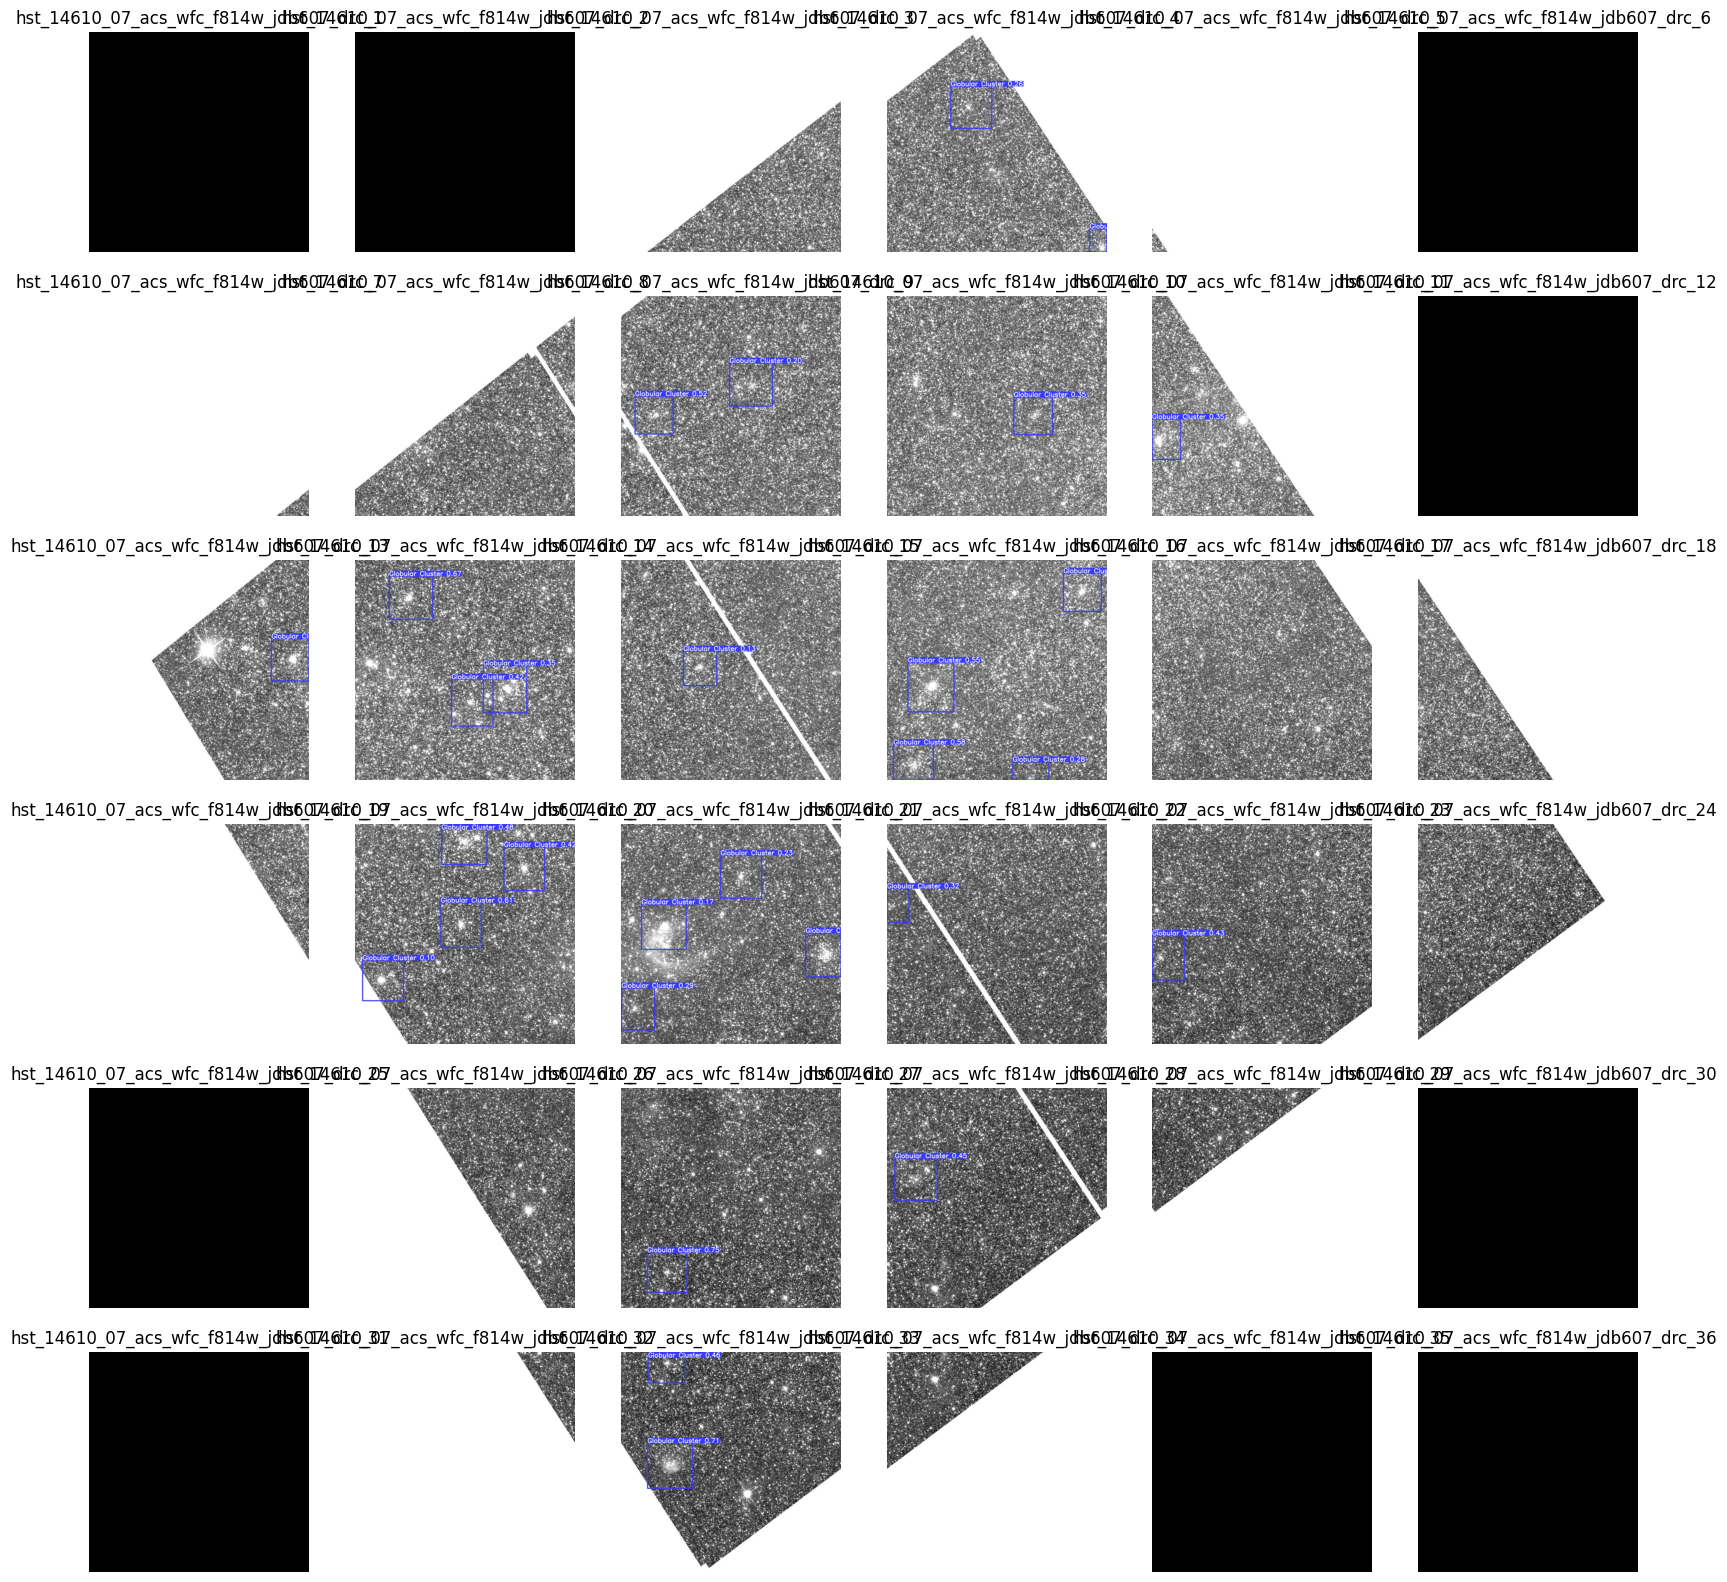

In [10]:
plot_image(x[5], path)

# load before crop images

In [11]:
# load from folder that was detected
labels_detected = load_obj(path + '/labels', '*')
len(labels_detected)

81

In [12]:
# read hst_14610_13_acs_wfc_f814w_jdb613_drc.txt
def read_txt(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        lines = [i.strip() for i in lines]
        lines = [i.split(' ') for i in lines]
    return lines

read_txt(labels_detected[0])


[['0', '0.664062', '0.544434', '0.175781', '0.170898']]

# Read full images, cropped

In [13]:
# load before crop
path_before_crop = os.path.join(desktop, 'detection_data/before_crop/images')
path_before_crop = load_obj(path_before_crop, '*')
path_before_crop

['C:\\Users\\news1\\Desktop\\detection_data/before_crop/images\\ASINH',
 'C:\\Users\\news1\\Desktop\\detection_data/before_crop/images\\Linear',
 'C:\\Users\\news1\\Desktop\\detection_data/before_crop/images\\Log',
 'C:\\Users\\news1\\Desktop\\detection_data/before_crop/images\\Power',
 'C:\\Users\\news1\\Desktop\\detection_data/before_crop/images\\SINH',
 'C:\\Users\\news1\\Desktop\\detection_data/before_crop/images\\Sqrt',
 'C:\\Users\\news1\\Desktop\\detection_data/before_crop/images\\Squarded']

In [14]:
# map exp -> /images\\ASINH , exp2 ->  /images\\Linear, exp3 -> /images\\Log, exp4 -> /images\\Sinh, ...

In [15]:
x[0][0:3]

['hst_14610_15_acs_wfc_f814w_jdb615_drc_1',
 'hst_14610_15_acs_wfc_f814w_jdb615_drc_2',
 'hst_14610_15_acs_wfc_f814w_jdb615_drc_3']

In [16]:
path_before_crop[0], x[0][0]

('C:\\Users\\news1\\Desktop\\detection_data/before_crop/images\\ASINH',
 'hst_14610_15_acs_wfc_f814w_jdb615_drc_1')

In [17]:
# get size images before crop each subfolder -> return list
def get_size_images(path_to_subfolder, set_ex):
    size_images = []
    for i in set_ex:
        img = cv2.imread(os.path.join(path_to_subfolder, i+'.jpg'), 1)
        size_images.append(img.shape)
    return size_images

size_images = get_size_images(path_before_crop[0], set_x)

In [18]:
(size_images[0])

(5927, 5932, 3)

In [19]:
set_x

{'hst_14610_07_acs_wfc_f814w_jdb607_drc',
 'hst_14610_13_acs_wfc_f814w_jdb613_drc',
 'hst_14610_15_acs_wfc_f814w_jdb615_drc',
 'hst_14610_20_acs_wfc_f814w_jdb620_drc',
 'hst_14610_24_acs_wfc_f814w_jdb624_drc',
 'hst_14610_51_acs_wfc_f814w_jdb651_drc'}

# try only one image

In [20]:
labels_detected[0:5] # for only exp

['C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp/labels\\hst_14610_07_acs_wfc_f814w_jdb607_drc_10.txt',
 'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp/labels\\hst_14610_07_acs_wfc_f814w_jdb607_drc_11.txt',
 'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp/labels\\hst_14610_07_acs_wfc_f814w_jdb607_drc_13.txt',
 'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp/labels\\hst_14610_07_acs_wfc_f814w_jdb607_drc_14.txt',
 'C:\\Users\\news1\\Desktop\\result_exp/310123/detect\\exp/labels\\hst_14610_07_acs_wfc_f814w_jdb607_drc_15.txt']

In [21]:
# images after crop
# for only exp
x[0][0:3]

['hst_14610_15_acs_wfc_f814w_jdb615_drc_1',
 'hst_14610_15_acs_wfc_f814w_jdb615_drc_2',
 'hst_14610_15_acs_wfc_f814w_jdb615_drc_3']

In [30]:
for i in labels_detected:
    # print file name
    print(i)
    print(read_txt(i))
    

C:\Users\news1\Desktop\result_exp/310123/detect\exp/labels\hst_14610_07_acs_wfc_f814w_jdb607_drc_10.txt
[['0', '0.664062', '0.544434', '0.175781', '0.170898']]
C:\Users\news1\Desktop\result_exp/310123/detect\exp/labels\hst_14610_07_acs_wfc_f814w_jdb607_drc_11.txt
[['0', '0.0649414', '0.651367', '0.129883', '0.183594']]
C:\Users\news1\Desktop\result_exp/310123/detect\exp/labels\hst_14610_07_acs_wfc_f814w_jdb607_drc_13.txt
[['0', '0.914551', '0.453125', '0.170898', '0.191406']]
C:\Users\news1\Desktop\result_exp/310123/detect\exp/labels\hst_14610_07_acs_wfc_f814w_jdb607_drc_14.txt
[['0', '0.681641', '0.586914', '0.197266', '0.214844'], ['0', '0.532715', '0.647949', '0.188477', '0.211914'], ['0', '0.253906', '0.170898', '0.197266', '0.195312']]
C:\Users\news1\Desktop\result_exp/310123/detect\exp/labels\hst_14610_07_acs_wfc_f814w_jdb607_drc_15.txt
[['0', '0.358887', '0.492188', '0.151367', '0.15625']]
C:\Users\news1\Desktop\result_exp/310123/detect\exp/labels\hst_14610_07_acs_wfc_f814w_jdb6

In [ ]:
def compare_path():
    pass